# X (Formerly Twitter) sentiment analysis

This is part of my process of learning NLP. I will be applying different algorithms to find sentiments from previously unseen data.

## Import libraries

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/adityasingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data

In [2]:
data = pd.read_csv("./data/train.csv")

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Preprocessing of the data

### NULL/NA values removal

In [4]:
print(f"Any NA/NULL values?\n\n {data.isna().sum()}")

Any NA/NULL values?

 textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


We can see that there are few (1 to be precise) NULL/NA values in the dataset. Since, the number is very small we will drop those rows.

In [5]:
data.dropna(inplace=True)

In [6]:
data.describe().T

,count,unique,top,freq
textID,27480,27480,cb774db0d1,1
text,27480,27480,"I`d have responded, if I were going",1
selected_text,27480,22463,good,199
sentiment,27480,3,neutral,11117


### Basic analysis of data and count samples from different sentiment classes

In [7]:
print(f"Unique sentiment types in the data are: {data.sentiment.unique()}")

Unique sentiment types in the data are: ['neutral' 'negative' 'positive']


In [8]:
print(f"Total samples for each sentiment is: \n{data.sentiment.value_counts()}")

Total samples for each sentiment is: 
neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64


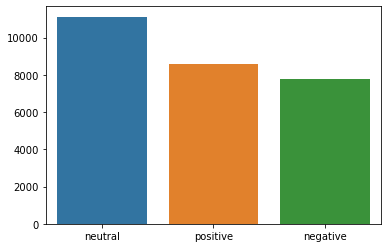

In [9]:
sns.barplot(x = data.sentiment.value_counts().index, y = data.sentiment.value_counts().values)
plt.show()

The graph shows that there is not much difference in the number of samples for each class. There is a little bit of difference between `neutral` and others. But the difference between `positive` and `negative` is very small. We can go ahead with this kind of distribution :)

Let us also convert the sentiment into their numerical equivalent.
`positive => 1`
`neutral => 0`
`negative => -1`

In [15]:
# Define the mapping
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}

# Map the values and create a new column
data['label'] = data['sentiment'].map(sentiment_mapping)

In [16]:
data.to_csv("./data/data_clean_in_text.csv", index=False)

## Wordcloud

In [17]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adityasingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data_positive = data[data.sentiment == "positive"]
data_negative = data[data.sentiment == "negative"]
data_neutral = data[data.sentiment == "neutral"]

In [19]:
def removeStopWords(x):
    # Tokenize the text
    words = word_tokenize(x)
    # Remove stop words
    combined = [word for word in words if word.lower() not in stopwords.words('english')]
    text = ' '.join(combined)
    return text

In [20]:
positiveCombinedText = " ".join(data_positive.text)
negativeCombinedText = " ".join(data_negative.text)
neutralCombinedText = " ".join(data_neutral.text)

positiveCombinedText = removeStopWords(positiveCombinedText)
negativeCombinedText = removeStopWords(negativeCombinedText)
neutralCombinedText = removeStopWords(neutralCombinedText)

### Positive sentiment text wordcloud

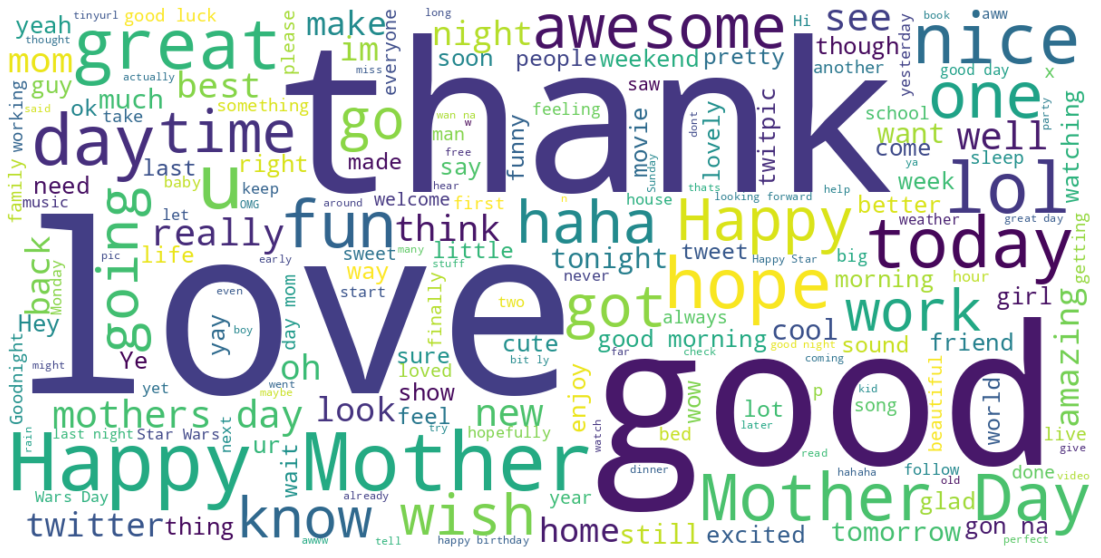

In [21]:
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(positiveCombinedText)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative sentiment text wordcloud

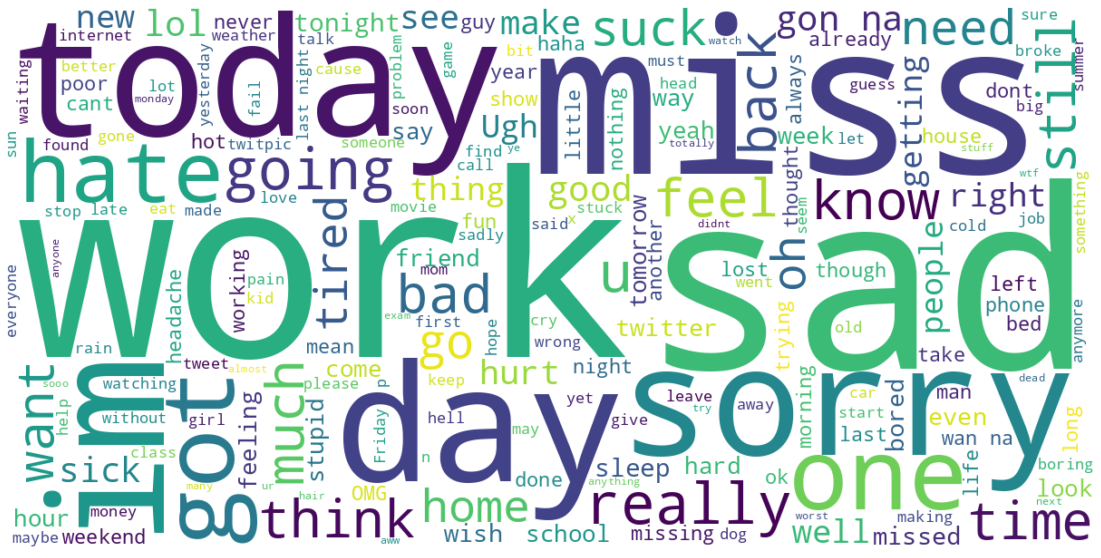

In [22]:
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(negativeCombinedText)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Neutral sentiment text wordcloud

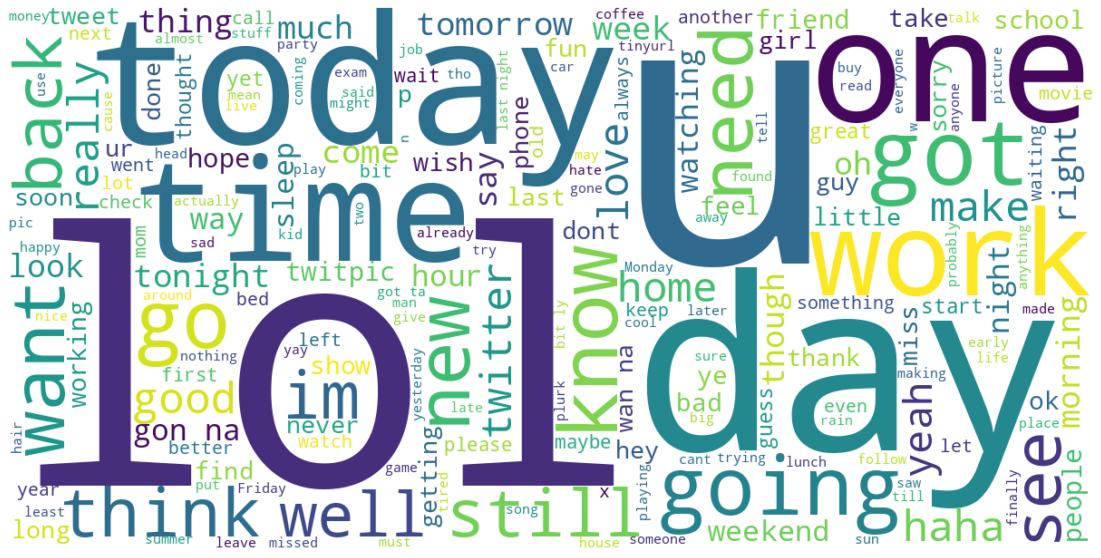

In [23]:
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(neutralCombinedText)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()